## *Exploratory Data Analysis*

**TASK 15 - Practical Task**

In this task, we are doing Exploratory Data Analysis (EDA) research using the 'Titanic.csv' dataset. Delve into this dataset and answer the questions at the end of the notebook.

In [3]:
# Import Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

### ***Understand the Dataset***

In [4]:
# Load the 'Titanic' dataset
data = pd.read_csv('Titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# Quick check on dataset for gain general informations
data.info()
print('\nDataset consist of (row, column) =', data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Dataset consist of (row, column) = (891, 12)


In [6]:
# Check the object type data columns
object_columns = data.select_dtypes(["object"]).columns
object_columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [7]:
# Get descriptive statistics
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
# Get the number of missing data points per column
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

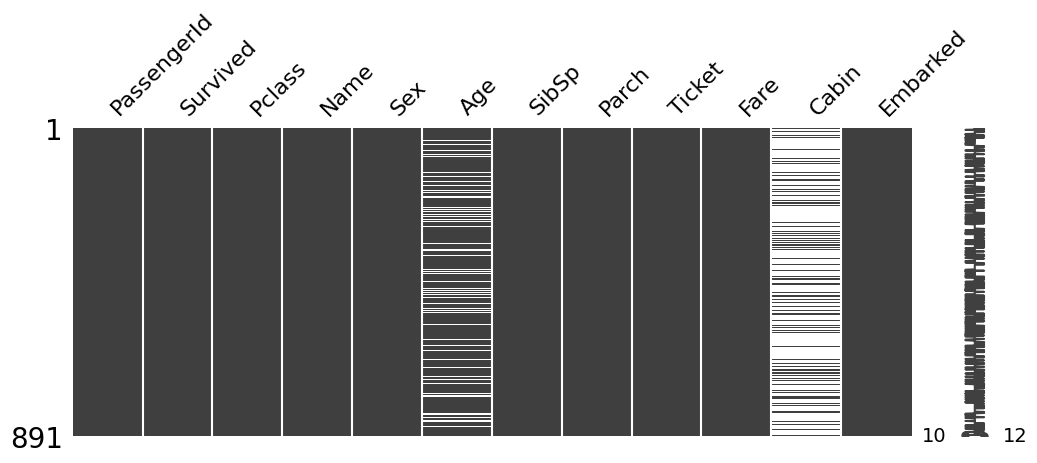

In [9]:
# Plot graphic of missing values
missingno.matrix(data, figsize = (12,4))

In [10]:
# Display unique values to understand for distribution
# In 'Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin' and 'Embarked' columns 
print('Different values in "Pclass" column: ', data['Pclass'].unique())
print('Different values in "Sex" column: ',data['Sex'].unique())
print('Different values in "SibSp" column: ',data['SibSp'].unique())
print('Different values in "Parch" column: ',data['Parch'].unique())
print('Different values in "Cabin" column: ',data['Cabin'].unique())
print('Different values in "Embarked" column: ',data['Embarked'].unique())

Different values in "Pclass" column:  [3 1 2]
Different values in "Sex" column:  ['male' 'female']
Different values in "SibSp" column:  [1 0 3 4 2 5 8]
Different values in "Parch" column:  [0 1 2 5 3 4 6]
Different values in "Cabin" column:  [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' '

Sex
male      577
female    314
Name: count, dtype: int64


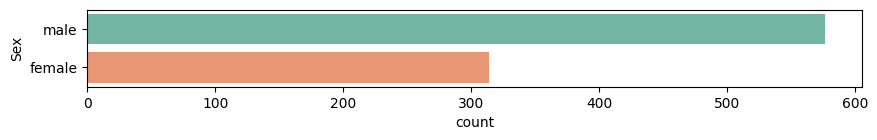

In [11]:
# How many clients are Male and Female
fig = plt.figure(figsize=(10,1))
sns.countplot(y='Sex', data=data, hue='Sex', legend=False, palette='Set2')
print(data.Sex.value_counts())

In [12]:
# How many people are Survived and Died
survive = data.Survived[data['Survived'] == 1].count()
died = data.Survived[data['Survived'] == 0].count()
print('Number of Survived = ', survive, '\nNumber of Died = ', died)

Number of Survived =  342 
Number of Died =  549


Text(0.5, 1.0, 'Age Distribution')

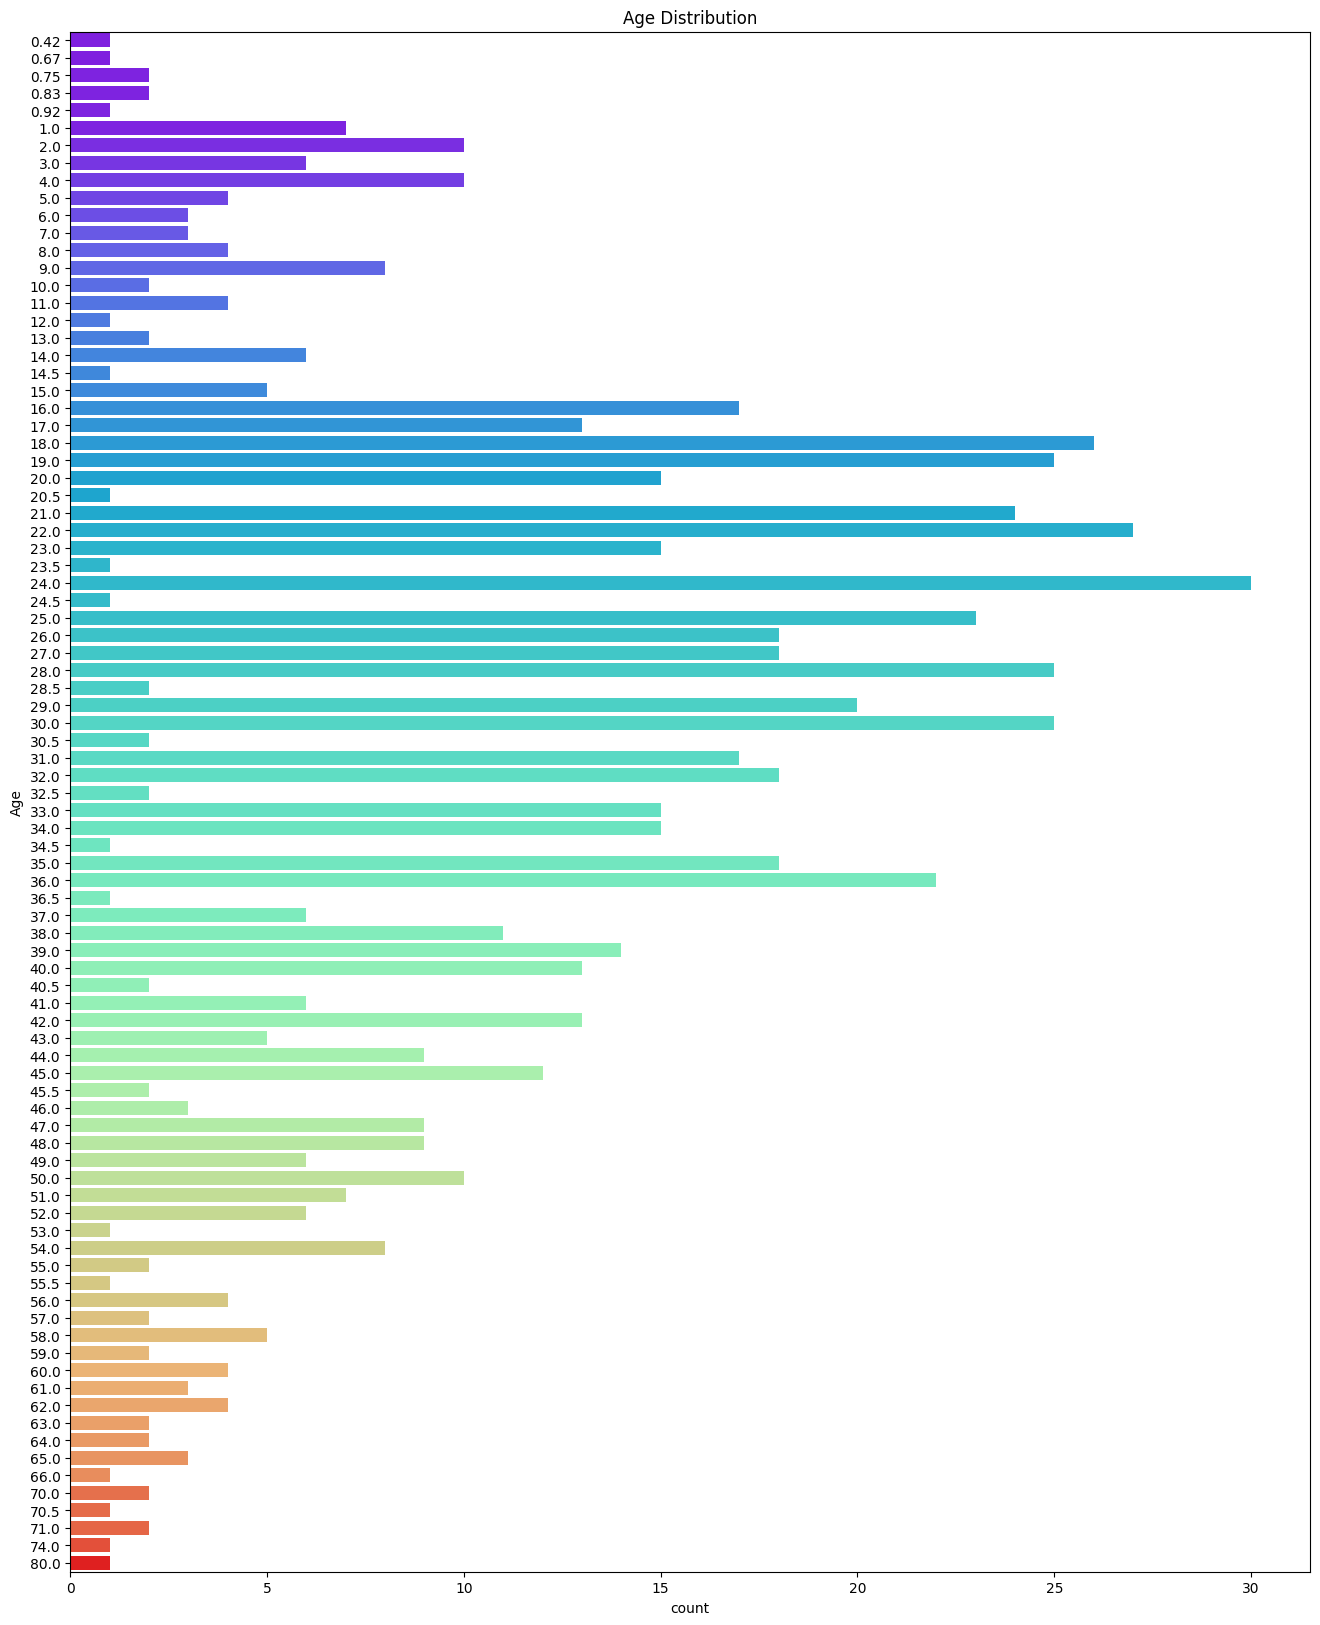

In [13]:
# Lets look at the Age distribution
fig = plt.figure(figsize=(16,20))
sns.countplot(y=data['Age'], data=data, palette='rainbow', hue=data['Age'], legend=False)
plt.title('Age Distribution')

### ***Clean and Preprocess***

In [14]:
# Dropped "Cabin" and after "Ticket", "Name", "PassengerId" columns which are irrelevant
# The raw data remains with the same name in case it is needed in the future.
df_1 = data.copy()  # df_1 is 1st version of processed dataset
df_1=df_1.drop(columns=['PassengerId','Name','Ticket','Cabin'])
df_1.sample(7)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
449,1,1,male,52.0,0,0,30.5000,S
379,0,3,male,19.0,0,0,7.7750,S
290,1,1,female,26.0,0,0,78.8500,S
282,0,3,male,16.0,0,0,9.5000,S
557,0,1,male,NaN,0,0,227.5250,C
879,1,1,female,56.0,0,1,83.1583,C
463,0,2,male,48.0,0,0,13.0000,S


In [15]:
# Age attiribute has some NaN values. Choosed to fill NaNs with average.
print('Average Age in the data is:',df_1['Age'].mean().round(1))
df_1['Age'] = df_1['Age'].fillna(df_1['Age'].mean().round(1))

Average Age in the data is: 29.7


In [16]:
# Fill missing values in 'Embarked' with the most common value
df_1["Embarked"] = df_1["Embarked"].fillna(df_1["Embarked"].mode()[0])
df_1['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [17]:
# Lets check again the processed dataset
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


There is still 2 object type columns in the dataset.  
We can do 'ONE-HOT ENCODING' for these columns.

In [18]:
# One-Hot Encoding to object type columns
df_2 = pd.get_dummies(df_1, prefix="Sex", columns=["Sex"], dtype=int)
df_2 = pd.get_dummies(df_2, prefix="Embarked", columns=["Embarked"], dtype=int)
df_2.head()  # df_2 is 2nd version of processed dataset

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


### ***Explore Relationships***

Ready to analyse dataset is 'df_2'

<Figure size 1000x1000 with 0 Axes>

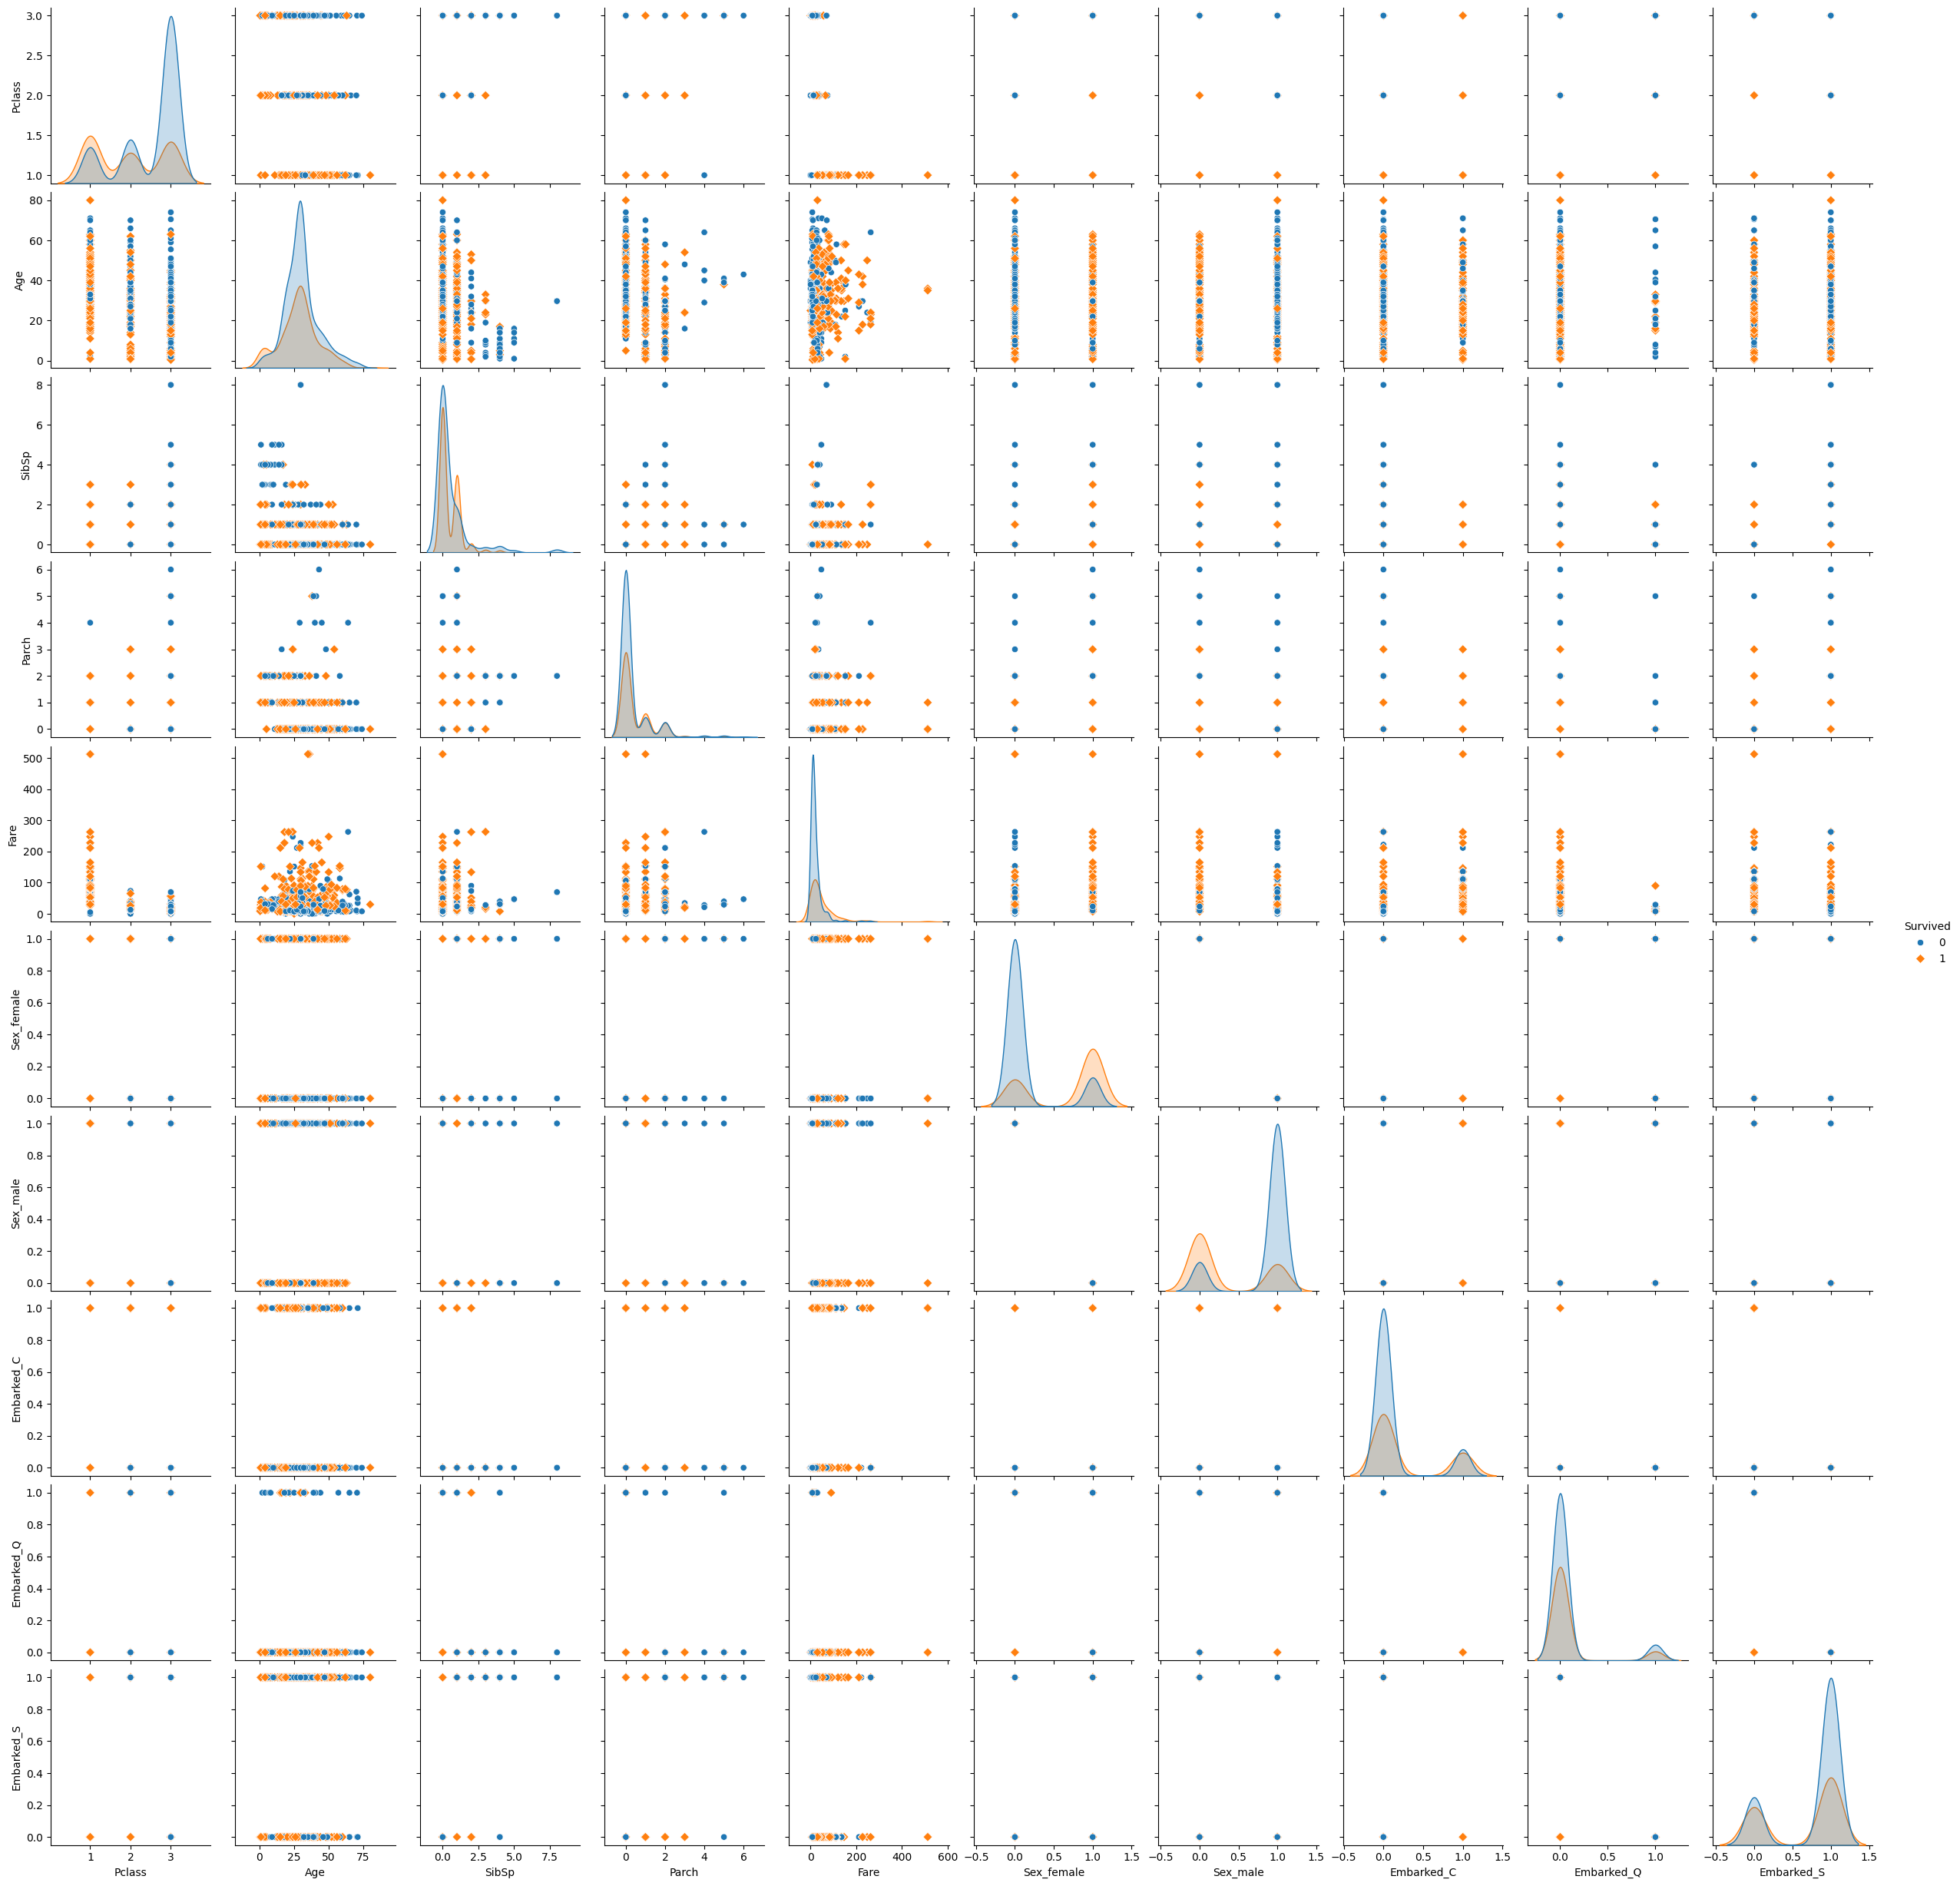

In [19]:
# Plot the detailed distribution of the data
plt.figure(figsize=(10,10))
sns.pairplot(df_2, hue = 'Survived', markers=["o","D"])

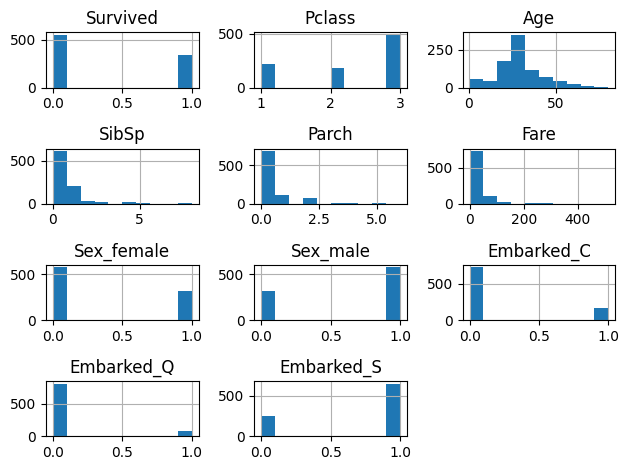

In [20]:
# Histogram of the processed dataset
df_2.hist()
plt.tight_layout()

<Axes: >

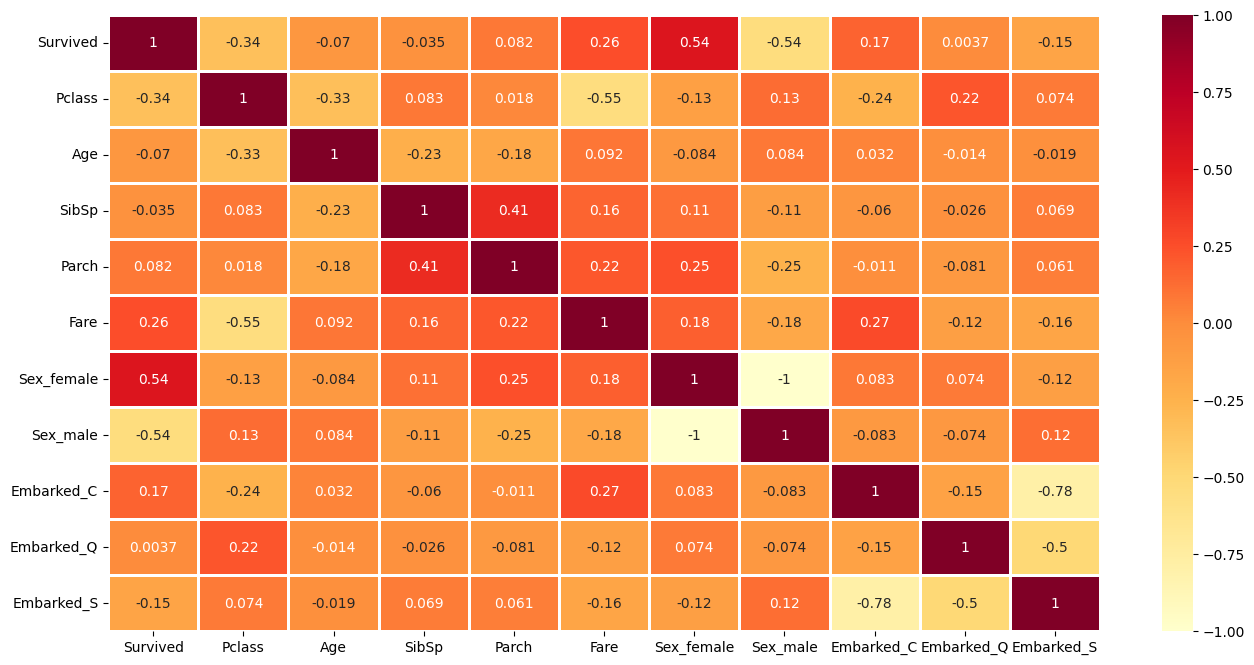

In [21]:
# Let's look at the features and how they relate to the target by using a heat map.
plt.figure(figsize=(16,8))
sns.heatmap(df_2.corr(),annot=True,cmap='YlOrRd', linewidths=2)

"Sex" is the most related feature between the target ('Survived').  
"Pclass" is second, "Fare" is third and "Embarked_C" is fourth related features with target.  
Lets dive into these features starting from most related one.

#### *1. Gender*

In this section, dive into 'Sex' faeture which is the most related with the target variable.

Remember how many total survivers;
Number of Survived =  342 
Number of Died =  549


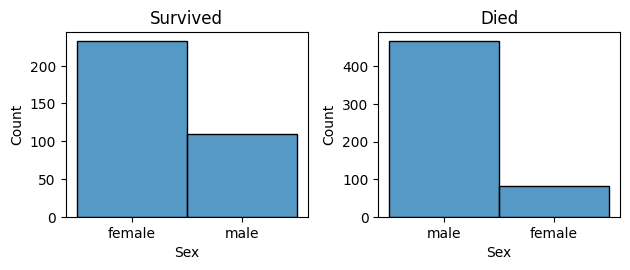

In [22]:
# First investigate 'Sex' variables in raw dataset as an objective type
# There is no missing value in raw dataset for gender
plt.subplot(2,2,1)
sns.histplot(data.loc[data['Survived'] == 1 ]['Sex'], kde_kws={'label': 'Sex'})
plt.title('Survived')
plt.subplot(2,2,2)
sns.histplot(data.loc[data['Survived'] == 0 ]['Sex'], kde_kws={'label': 'Sex'})
plt.title('Died')
plt.tight_layout()
print('Remember how many total survivers;\nNumber of Survived = ', survive, '\nNumber of Died = ', died)

In [23]:
female = df_2.loc[df_2['Sex_female'] == 1 , ['Survived']]
num_fem = len(female)
asurvived_female = female.loc[female['Survived'] == 1]
num_sur_fem = len(asurvived_female)
print('Total number of women:', num_fem)
print('Number of women survivors:', num_sur_fem)
male = df_2.loc[df_2['Sex_male'] == 1 , ['Survived']]
num_mal = len(male)
survived_male = male.loc[male['Survived'] == 1]
num_sur_mal = len(survived_male)
print('Total number of men:', num_mal)
print('Number of men survivors:', num_sur_mal)
print(f'%{100*(num_sur_fem/num_fem):.1f} percentage of women and %{100*(num_sur_mal/num_mal):.1f} percentage of men survived.')

Total number of women: 314
Number of women survivors: 233
Total number of men: 577
Number of men survivors: 109
%74.2 percentage of women and %18.9 percentage of men survived.


As can be seen, Gender (Being a woman) is the most important factor in surviving the Titanic incident.

#### *2. Passengers Class*

In this section analyse Passengers Class and Fare together as they are logically related to each other.

Text(0.5, 1.0, 'Tickets Fare Distribution')

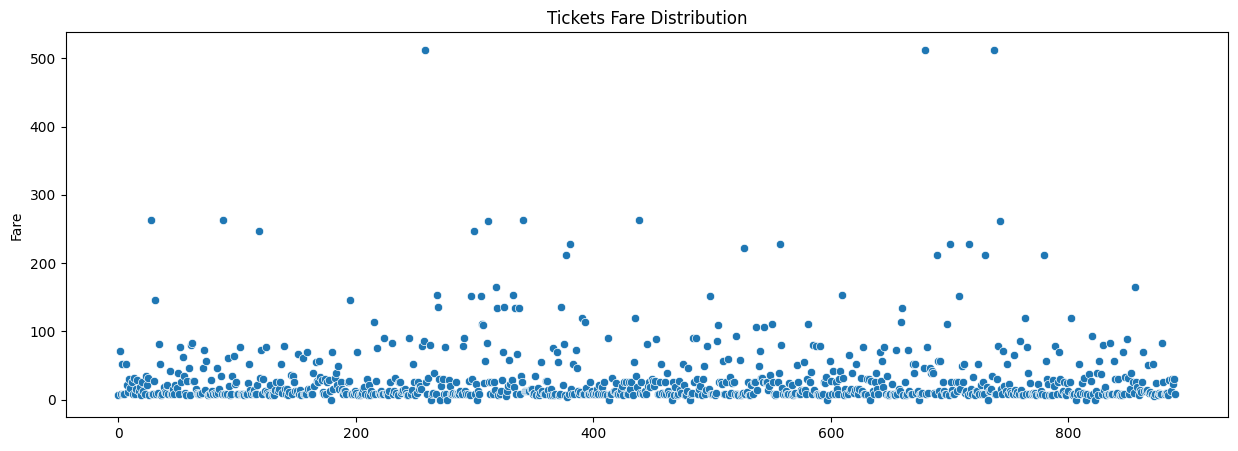

In [24]:
# Look for ticket price distribution
fig = plt.figure(figsize=(15,5))
sns.scatterplot(data=df_2['Fare'])
plt.title('Tickets Fare Distribution')

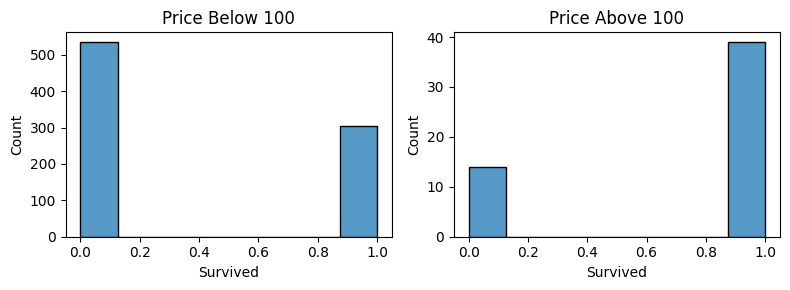

In [25]:
# Let's try those who pay below 100 ticket price and those who pay above.
fig = plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.histplot(df_2.loc[df_2['Fare'] < 100 ]['Survived'], bins=8, kde_kws={'label': 'Died / Survived'})
plt.title('Price Below 100')
plt.subplot(1,2,2)
sns.histplot(df_2.loc[df_2['Fare'] >= 100 ]['Survived'], bins=8, kde_kws={'label': 'Died / Survived'})
plt.title('Price Above 100')
plt.tight_layout()

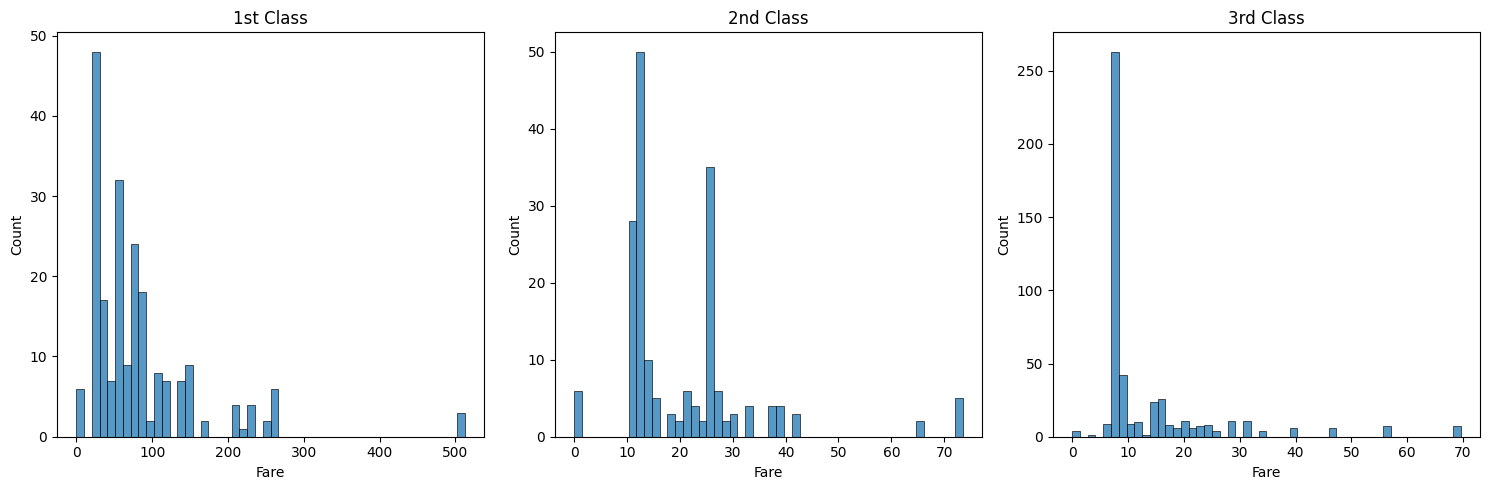

Ticket price - Passengers class (Comparisation)


In [26]:
# Ticket price and passengers class relation
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data.loc[data['Pclass'] == 1 ]['Fare'], bins=50, kde_kws={'label': 'Fare'})
plt.title('1st Class')
plt.subplot(1,3,2)
sns.histplot(data.loc[data['Pclass'] == 2 ]['Fare'], bins=50, kde_kws={'label': 'Fare'})
plt.title('2nd Class')
plt.subplot(1,3,3)
sns.histplot(data.loc[data['Pclass'] == 3 ]['Fare'], bins=50, kde_kws={'label': 'Fare'})
plt.title('3rd Class')
plt.tight_layout()
plt.show()
print('Ticket price - Passengers class (Comparisation)')

In [27]:
# Mean ticket price
print(f'Average ticket price is: {df_2['Fare'].mean():.2f}')

Average ticket price is: 32.20


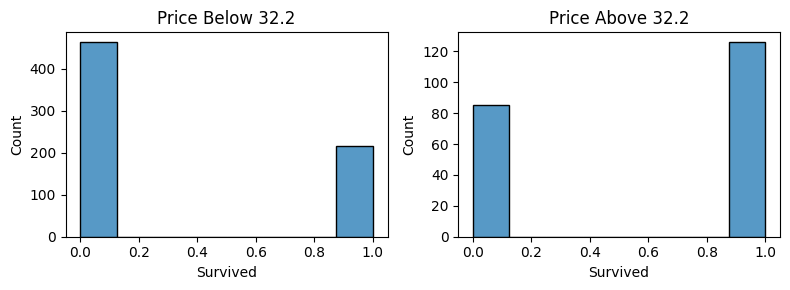

In [28]:
# Let's look at those who pay below the average ticket price and those who pay above.
fig = plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.histplot(df_2.loc[df_2['Fare'] < 32.20 ]['Survived'], bins=8, kde_kws={'label': 'Died / Survived'})
plt.title('Price Below 32.2')
plt.subplot(1,2,2)
sns.histplot(df_2.loc[df_2['Fare'] >= 32.20 ]['Survived'], bins=8, kde_kws={'label': 'Died / Survived'})
plt.title('Price Above 32.2')
plt.tight_layout()

It doesn't seem to make much sense since there are a lot of 1st class passengers paying below the average ticket price.

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64


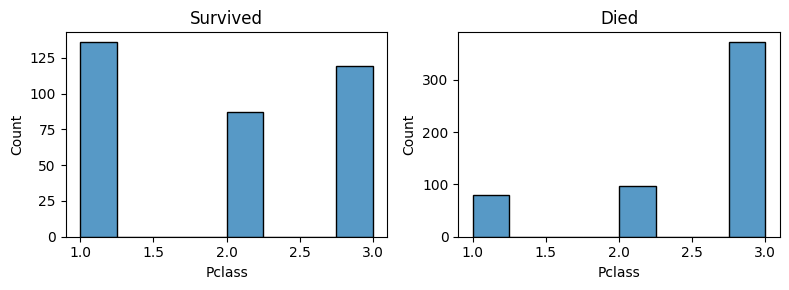

In [29]:
# Lets move on with Passengers Class feature instead of Fare
fig = plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.histplot(df_2.loc[df_2['Survived'] == 1 ]['Pclass'], bins=8, kde_kws={'label': 'Pclass'})
plt.title('Survived')
plt.subplot(1,2,2)
sns.histplot(df_2.loc[df_2['Survived'] == 0 ]['Pclass'], bins=8, kde_kws={'label': 'Pclass'})
plt.title('Died')
plt.tight_layout()
print(df_2.groupby('Pclass')['Survived'].value_counts())

In [30]:
# Survival rate by passenger class
survival_by_class = df_2.groupby('Pclass')['Survived'].mean()
print('Surviving percentage by passengers class:\n', survival_by_class)

Surviving percentage by passengers class:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


As can be seen, 1st class passangers survived the most, with a rate of %63.  
2nd class passengers' surviving rate is %47, and 3rd class passengers' surviving rate is %24.

#### *3. Do Women and Children always come first?*

In this section, we try to find an answer this question; "Do Women and Children always come first?"

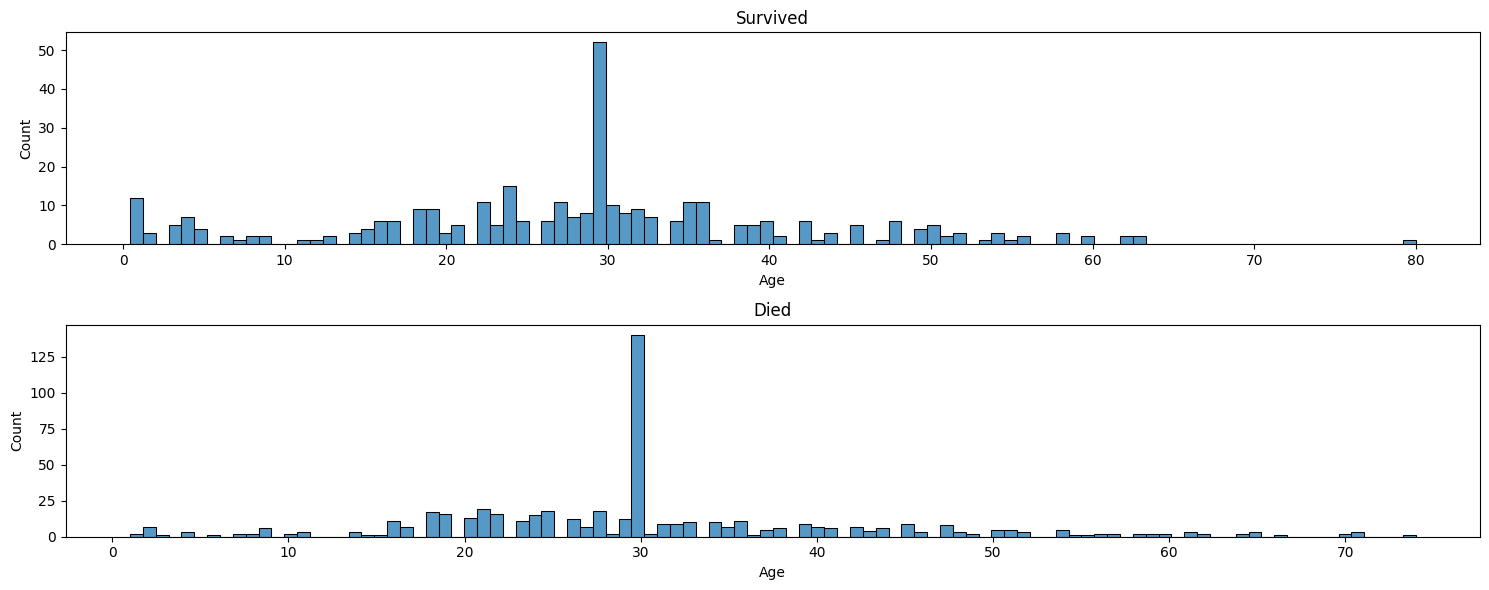

In [31]:
# Age compare for survived or died
fig = plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
sns.histplot(df_2.loc[data['Survived'] == 1 ]['Age'], bins=100, kde_kws={'label': 'Age'})
plt.title('Survived')
plt.subplot(2,1,2)
sns.histplot(df_2.loc[data['Survived'] == 0 ]['Age'], bins=100, kde_kws={'label': 'Age'})
plt.title('Died')
plt.tight_layout()

Maximum Age in the dataset is:  80.0


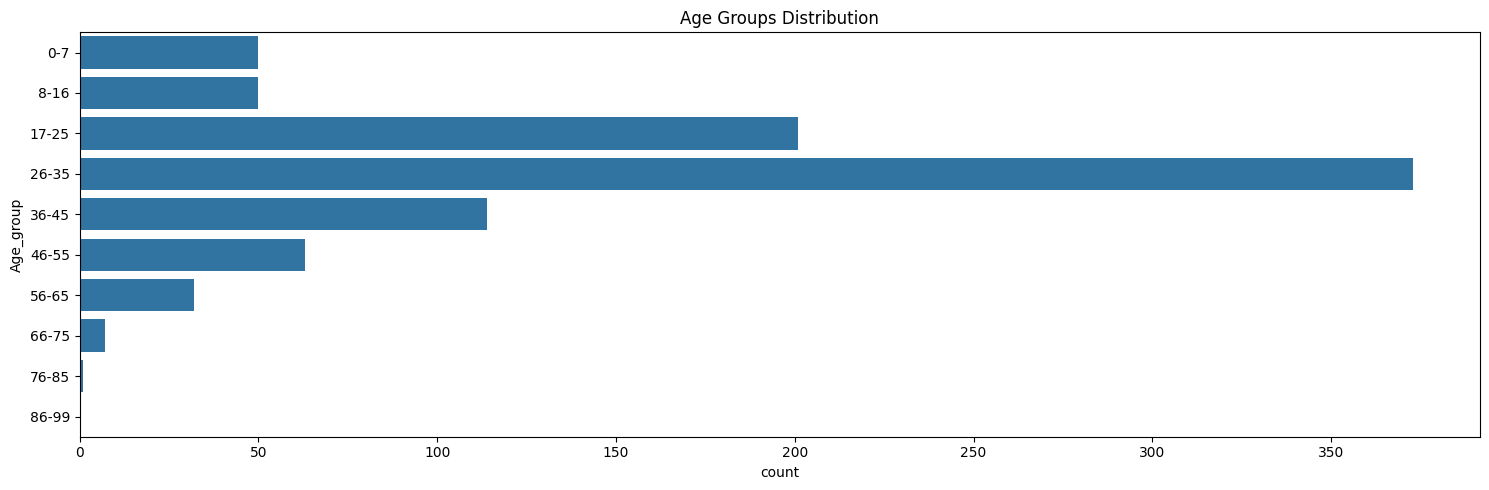

In [32]:
# Age Groups distribution in the dataset
print('Maximum Age in the dataset is: ', df_2['Age'].max())
df_2['Age_group'] = pd.cut(df_2['Age'], [0,7,16,25,35,45,55,65,75,85,99], 
                   labels=['0-7','8-16','17-25','26-35','36-45','46-55','56-65','66-75',
                           '76-85','86-99'])

fig = plt.figure(figsize=(15,5))
sns.countplot(y=df_2['Age_group'], data=df_2)
plt.title('Age Groups Distribution')
plt.tight_layout()

In [33]:
# How many children and adults were in the Titanic?
# Define children as those under 16
child = df_2.loc[df_2['Age'] <= 16]
num_child = len(child)
print('Number of child (under 16) :', num_child)

adult = df_2.loc[df_2['Age'] > 16]
num_adult = len(adult)
print('Number of adult (over 16) :', num_adult)

Number of child (under 16) : 100
Number of adult (over 16) : 791


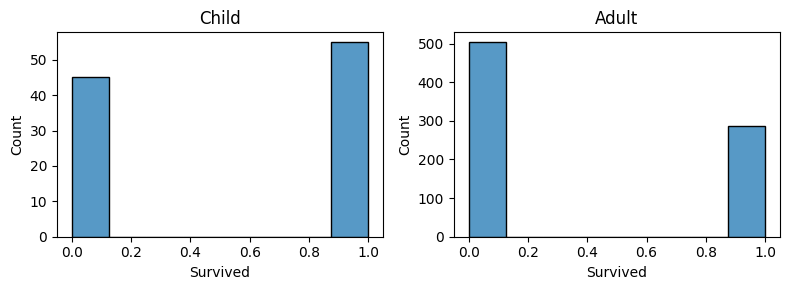

In [34]:
# How many children and adults did survive from the Titanic?
fig = plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.histplot(df_2.loc[df_2['Age'] <= 16 ]['Survived'], bins=8, kde_kws={'label': 'Survived'})
plt.title('Child')
plt.subplot(1,2,2)
sns.histplot(df_2.loc[df_2['Age'] > 16 ]['Survived'], bins=8, kde_kws={'label': 'Survived'})
plt.title('Adult')
plt.tight_layout()

In [35]:
# How many children and adults did survive from the Titanic?
# Starting this analyse create new version of dataset first
# Make new feature columns 'Child' and 'Adult'
df_3 = df_2.copy()  # 
df_3['Child'] = df_3['Age'] <= 16
df_3['Adult'] = df_3['Age'] > 16

child_df = df_3.loc[df_3['Child'] == 1 , ['Survived']]
child_df = child_df.loc[df_3['Survived'] == 1]
print('How many child survived is: ', len(child_df))

adult_df = df_3.loc[df_3['Adult'] == 1 , ['Survived']]
adult_df = adult_df.loc[df_3['Survived'] == 1]
print('How many total adult survived is: ', len(adult_df))
adult_fem_df = adult_df.loc[df_3['Sex_female'] == 1]
print('How many female adult survived is: ', len(adult_fem_df))
print('How many male adult survived is: ', len(adult_df) - len(adult_fem_df))
print(f'%{100*(len(child_df)/num_child):.1f} percentage of child survived.')


How many child survived is:  55
How many total adult survived is:  287
How many female adult survived is:  200
How many male adult survived is:  87
%55.0 percentage of child survived.


In [36]:
# Survival rate by gender
survival_by_gender = data.groupby('Sex')['Survived'].mean()
print(survival_by_gender)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


As can be seen, the survival rates of women and children are many times higher than men in the Titanic incident.

#### *4. One other significant observation*

In this section, we are looking for a other important factor to surviving in the Titanic.

In [37]:
# Check the last version of dataset for finding one more observation
df_3

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_group,Child,Adult
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,17-25,False,True
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,36-45,False,True
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,26-35,False,True
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,26-35,False,True
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,26-35,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1,26-35,False,True
887,1,1,19.0,0,0,30.0000,1,0,0,0,1,17-25,False,True
888,0,3,29.7,1,2,23.4500,1,0,0,0,1,26-35,False,True
889,1,1,26.0,0,0,30.0000,0,1,1,0,0,26-35,False,True


In [38]:
# Check unique values of columns not yet used 
# from before one-hot encoding dataset (df_1)
dif_sibsp = df_1['SibSp'].unique()
dif_parch = df_1['Parch'].unique()
dif_embarked = df_1['Embarked'].unique()
print('SibSp unique:', dif_sibsp,
      '\nParch unique:', dif_parch,
      '\nEmbarked unique:', dif_embarked)


SibSp unique: [1 0 3 4 2 5 8] 
Parch unique: [0 1 2 5 3 4 6] 
Embarked unique: ['S' 'C' 'Q']


According to the heatmap, Embarkment features have the 4th highest relationship ratio with the target after gender, age and passenger class.  
- Embarked_C has positve relationship (0.17) with target.  
- Embarked_S has negative relationship (-0.15) with target.  

Lets delve into these features.

In [39]:
# Count Embarkment numbers from before one-hot encoding dataset (df_1)
df_1.groupby('Embarked')['Survived'].count()

Embarked
C    168
Q     77
S    646
Name: Survived, dtype: int64

In [40]:
# Quick analyse surviving ratio by Embarkement column in df_1
print('Positive surviving rate by', df_1.groupby('Embarked')['Survived'].mean())

Positive surviving rate by Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


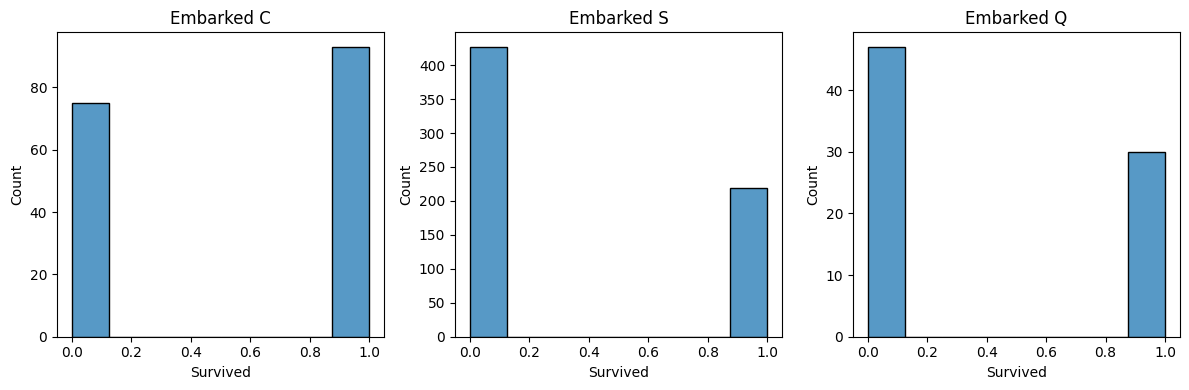

In [41]:
# Look at the chart to observe the relationship between Embarkment and Survivors
fig=plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(df_3.loc[df_3['Embarked_C']==1]['Survived'], bins=8, kde_kws={'label': 'Survived'})
plt.title('Embarked C')
plt.subplot(1,3,2)
sns.histplot(df_3.loc[df_3['Embarked_S']==1]['Survived'], bins=8, kde_kws={'label': 'Survived'})
plt.title('Embarked S')
plt.subplot(1,3,3)
sns.histplot(df_3.loc[df_3['Embarked_Q']==1]['Survived'], bins=8, kde_kws={'label': 'Survived'})
plt.title('Embarked Q')
plt.tight_layout()

According to this evaluation, if the person boarded from station C, the chance of survival is high with 55%, while the chance of survival for those who boarded from other stations is very low.  
But what if boarding stations are related to passenger class?

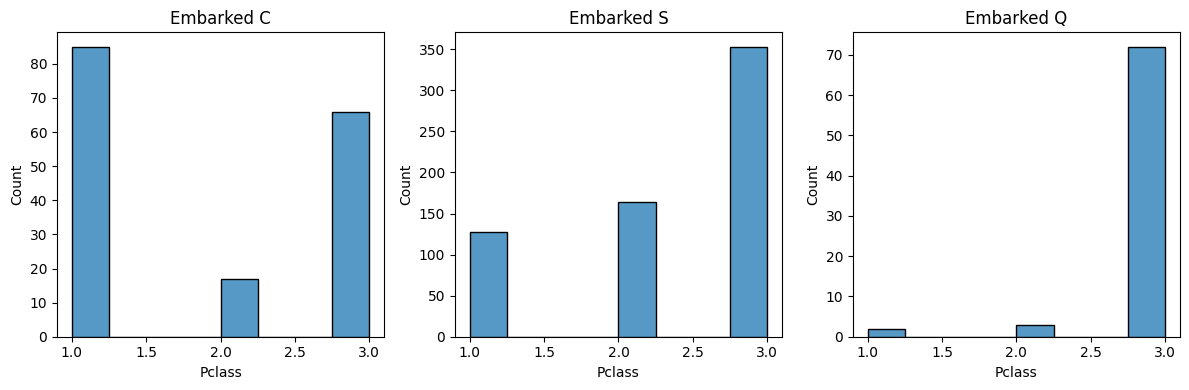

In [42]:
# Look at the chart to observe the relationship between Embarkment and Passengers Class
fig=plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data.loc[data['Embarked']=='C']['Pclass'], bins=8, kde_kws={'label': 'Survived'})
plt.title('Embarked C')
plt.subplot(1,3,2)
sns.histplot(data.loc[data['Embarked']=='S']['Pclass'], bins=8, kde_kws={'label': 'Survived'})
plt.title('Embarked S')
plt.subplot(1,3,3)
sns.histplot(data.loc[data['Embarked']=='Q']['Pclass'], bins=8, kde_kws={'label': 'Survived'})
plt.title('Embarked Q')
plt.tight_layout()

According to these charts, while mostly 1st class passengers board at C station, mostly 3rd class passengers board at other stations.  
However, while almost only 3rd class passengers boarded at Q station, the lowest escape rate occurred at S station.  
The reason for this can be explained by the large number of passengers boarding from S station.

However, boarding at station C may have provided an advantage to non-first class passengers.  
This can be explained by the location of the rooms.  

To find answers to these further questions, machine learning methods should be used.